# Plot significant clusters

In [113]:
home_dir = '/data/dian';
addpath(genpath(fullfile(home_dir, 'Dropbox/scripts/external/cbrewer2/cbrewer2')));
addpath(fullfile(home_dir, 'Dropbox/scripts/Stanford/CECS_Pipeline_COPY/personal_validation'))
addpath('~/scripts/my_functions')
addpath(genpath('~/scripts/Stanford/ThalamocoricalLoop-project'))
addpath(fullfile(home_dir, 'Dropbox/scripts/Stanford/CECS_Pipeline_COPY/CECS_Pipeline/CCEP_pipeline/HFB plot/subfunctions'));

% define working directory
data_folder = fullfile(home_dir, 'Dropbox/Stanford_Matters/data/THAL/CCEP/results/explore5_locked/GroupLevel_SigTest/Contrasted-nonactivated');
inputdata_folder = fullfile(home_dir, 'Dropbox/Stanford_Matters/data/THAL/CCEP/results/explore5_locked/UMAP/ALLDATA_semisupervise');
cd(data_folder)

## 1. THAL-ipsi vs. COR-ipsi

### 1.1 Within-subject paired t-test + group-level 1-sample t-test

In [135]:
stat1 = load('mnePermutationClusterTest_sigClsts_withinsbjT2sample_COR-ipsivsTHAL-ipsi.mat');
stat2 = load('mnePermutationClusterTest_sigClsts_withinsbjT2sample_THAL-ipsivsCOR-ipsi.mat');

In [136]:
stat1

stat1 = struct with fields:
               T_obs: [60x23 double]
            clusters: [2x60x23 logical]
    cluster_p_values: [2.0000e-04 2.0000e-04]
                  H0: [761.9128 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... ]
           T_obs_thr: [60x23 double]
               t_idx: 1
               f_idx: 11

In [138]:
%% plot significant spectCCEP
% get time/frequency information
info = load(sprintf('/data/dian/Dropbox/Stanford_Matters/data/THAL/CCEP/results/explore5_locked/spectCCEP/spectCCEP_power_%s.mat', ...
    'S21_166_TM'), 'time', 'freqs'); % example sbj
[~, rfreq, rtime] = reduceSpectrum([], info.freqs,info.time*1000,...
    [4, 4, 4, 4, 4, 3], [5 25 20 10],0);

freq = cell(length(rfreq),1);
for i = 1:length(rfreq)
    freq{i} = sprintf('%.1f', rfreq(i));
end

time = rtime/1000;


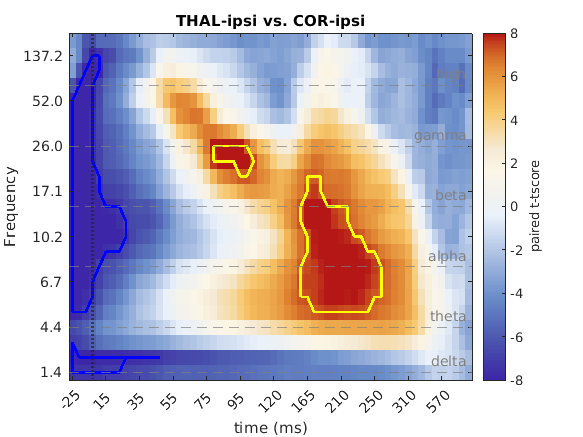

In [140]:

close all
cmap = myColors('red_blue_stanford',[],[],[],0);
cmap = cmap.cm;
labelstring = 'paired t-tscore'; % 'zscore-log(power)', 'zscore-sqrt(itpc)'
ttl = 'THAL-ipsi vs. COR-ipsi';
subplotCCEPspectrum(stat2.T_obs', ttl,time,freq,cmap,labelstring,5,3)
caxis([-8, 8])
% plot boundary
% pos
B = bwboundaries(stat2.T_obs_thr'>0);
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'y', 'LineWidth', 2)
end
% neg
B = bwboundaries(stat1.T_obs_thr'>0);
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'b', 'LineWidth', 2)
end
hold off
% save figure
exportgraphics(gcf, "plots/fig_mnePermutationClusterTest_sigClsts_withinsbjT2sample_COR-ipsivsTHAL-ipsi.pdf", 'Resolution',300)

### 1.2 Group-level 2-sample t-test (two-tailed)

In [89]:
statG = load('mnePermutationCluster2Sample-Ftest_sigClsts_COR-ipsi_vs_THAL-ipsi.mat');
statG

statG = struct with fields:
               F_obs: [60x23 double]
            clusters: [2x60x23 logical]
    cluster_p_values: [2.0000e-04 2.0000e-04]
                  H0: [1.6883e+05 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... ]
           F_obs_thr: [60x23 double]
               t_idx: 43
               f_idx: 6

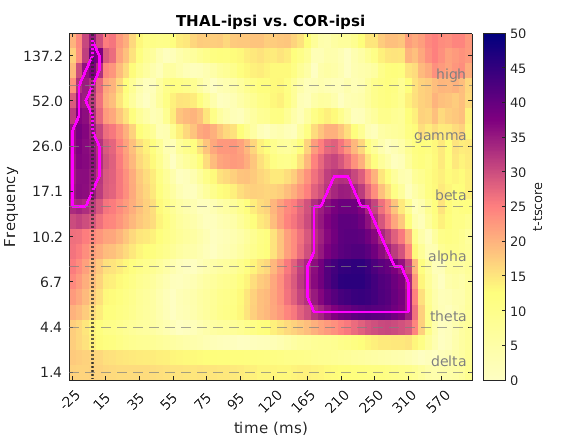

In [92]:
close all
cmap = myColors('dawn',[],[],[],0);
cmap = cmap.cm;
labelstring = 't-tscore'; % 'zscore-log(power)', 'zscore-sqrt(itpc)'
ttl = 'THAL-ipsi vs. COR-ipsi';
subplotCCEPspectrum(sqrt(statG.F_obs)', ttl,time,freq,cmap,labelstring,5,3)
caxis([0, 50])
% plot boundary
B = bwboundaries(statG.F_obs_thr'>0);
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'magenta', 'LineWidth', 2)
end
hold off
% save figure
exportgraphics(gcf, "plots/fig_mnePermutationClusterTest_sigClsts_withinsbjT2sample_COR-ipsivsTHAL-ipsi.pdf", 'Resolution',300)

## 2. THAL-contr vs. COR-contr

In [133]:
stat1 = load('mnePermutationClusterTest_sigClsts_withinsbjT2sample_COR-contrvsTHAL-contr.mat');
stat2 = load('mnePermutationClusterTest_sigClsts_withinsbjT2sample_THAL-contrvsCOR-contr.mat');

In [17]:
stat1

stat1 = struct with fields:
               T_obs: [60x23 double]
            clusters: [4x60x23 logical]
    cluster_p_values: [2.0000e-04 0.0044 0.0032 0.0036]
                  H0: [1.6765e+03 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... ]
           T_obs_thr: [60x23 double]
               t_idx: 1
               f_idx: 11

### 2.1 Within-subject paired t-test + group-level 1-sample t-test

In [134]:
%% plot significant spectCCEP
% get time/frequency information
info = load(sprintf('/data/dian/Dropbox/Stanford_Matters/data/THAL/CCEP/results/explore5_locked/spectCCEP/spectCCEP_power_%s.mat', ...
    'S21_166_TM'), 'time', 'freqs'); % example sbj
[~, rfreq, rtime] = reduceSpectrum([], info.freqs,info.time*1000,...
    [4, 4, 4, 4, 4, 3], [5 25 20 10],0);

freq = cell(length(rfreq),1);
for i = 1:length(rfreq)
    freq{i} = sprintf('%.1f', rfreq(i));
end

time = rtime/1000;


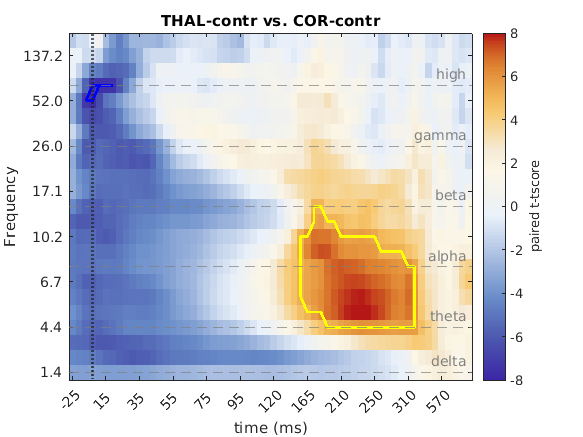

In [62]:

close all
cmap = myColors('red_blue_stanford',[],[],[],0);
cmap = cmap.cm;
labelstring = 'paired t-tscore'; % 'zscore-log(power)', 'zscore-sqrt(itpc)'
ttl = 'THAL-contr vs. COR-contr';
subplotCCEPspectrum(stat2.T_obs', ttl,time,freq,cmap,labelstring,5,3)
caxis([-8, 8])
% plot boundary
% pos
B = bwboundaries(stat2.T_obs_thr'>0);
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'y', 'LineWidth', 2)
end
% neg
B = bwboundaries(stat1.T_obs_thr'>0);
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'b', 'LineWidth', 2)
end
hold off

### 2.2 Group-level 2-sample t-test (two-tailed)

In [93]:
statG = load('mnePermutationCluster2Sample-Ftest_sigClsts_COR-contr_vs_THAL-contr.mat');
statG

statG = struct with fields:
               F_obs: [60x23 double]
            clusters: [1x60x23 logical]
    cluster_p_values: 2.0000e-04
                  H0: [4.1623e+04 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... ]
           F_obs_thr: [60x23 double]
               t_idx: 50
               f_idx: 6

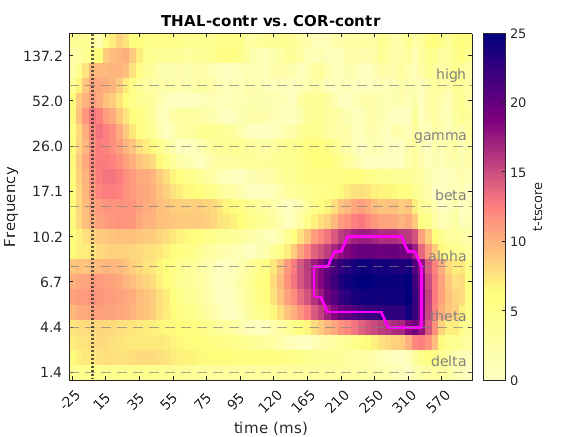

In [97]:
close all
cmap = myColors('dawn',[],[],[],0);
cmap = cmap.cm;
labelstring = 't-tscore'; % 'zscore-log(power)', 'zscore-sqrt(itpc)'
ttl = 'THAL-contr vs. COR-contr';
subplotCCEPspectrum(sqrt(statG.F_obs)', ttl,time,freq,cmap,labelstring,5,3)
caxis([0, 25])
% plot boundary
B = bwboundaries(statG.F_obs_thr'>0);
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'Color',"magenta", 'LineWidth', 2)
end
hold off

## 3. Contralateral vs. ipsilateral comparisons

### 3.1 THAL-ipsi vs. THAL-contr (Within-subject paired t-test + group-level 1-sample t-test)

In [115]:
stat1 = load('mnePermutationClusterTest_sigClsts_withinsbjT2sample_THAL-ipsivsTHAL-contr.mat');

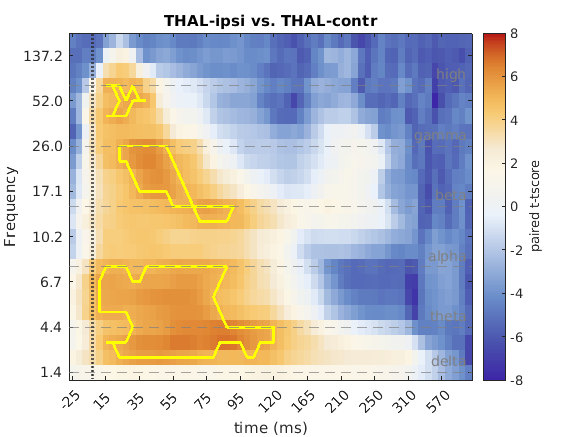

In [116]:

close all
cmap = myColors('red_blue_stanford',[],[],[],0);
cmap = cmap.cm;
labelstring = 'paired t-tscore'; % 'zscore-log(power)', 'zscore-sqrt(itpc)'
ttl = 'THAL-ipsi vs. THAL-contr';
subplotCCEPspectrum(stat1.T_obs', ttl,time,freq,cmap,labelstring,5,3)
caxis([-8, 8])
% plot boundary
% pos
B = bwboundaries(stat1.T_obs_thr'>0);
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'y', 'LineWidth', 2)
end
% neg is none
hold off

### 3.2 COR-ipsi vs. COR-contr (Within-subject paired t-test + group-level 1-sample t-test)

In [114]:
stat1 = load('mnePermutationClusterTest_sigClsts_withinsbjT2sample_COR-ipsivsCOR-contr.mat');

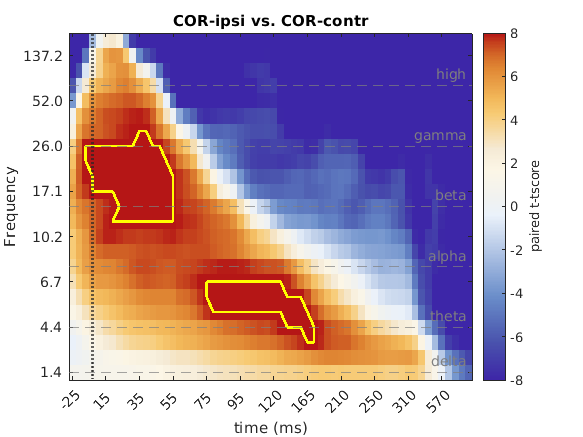

In [117]:

close all
cmap = myColors('red_blue_stanford',[],[],[],0);
cmap = cmap.cm;
labelstring = 'paired t-tscore'; % 'zscore-log(power)', 'zscore-sqrt(itpc)'
ttl = 'COR-ipsi vs. COR-contr';
subplotCCEPspectrum(stat1.T_obs', ttl,time,freq,cmap,labelstring,5,3)
caxis([-8, 8])
% plot boundary
% pos
B = bwboundaries(stat1.T_obs_thr'>0);
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'y', 'LineWidth', 2)
end
% neg is none
hold off

### 4. One-sample T-test on each category

In [5]:
%load data
d = load(fullfile(inputdata_folder, 'input_dat1_untransformed.mat'))

d = struct with fields:
    dat: [58598x2580 double]

In [6]:
% load other info
T = readtable(fullfile(inputdata_folder, 'brainInfo.csv'));
features = readcell(fullfile(inputdata_folder, 'cleanFeatures.txt'), Delimiter = "");
isnoise = textread(fullfile(inputdata_folder, 'isnoise.txt'), '%d', 'delimiter', '\n');

In [7]:
% exclude noise
T0 = T(isnoise==0,:);
features0 = features(isnoise==0);
d0 = d.dat(isnoise==0,:);

In [8]:
npw = 1380;
ntime = 60;
ftypes = unique(features0)

ftypes = 4x1 cell array
    {'COR-contr' }
    {'COR-ipsi'  }
    {'THAL-contr'}
    {'THAL-ipsi' }

#### 4.1 COR-ipsi

In [128]:
feature = 'COR-ipsi';
filterboolean = strcmp(features0, feature);
pw = reshape(mean(d0(filterboolean, 1:npw), 1, 'omitnan'), [],ntime);
stat1 = load(['mnePermutationCluster1Sample-Ttest_sigClsts_grouplogpower_' feature '.mat']);

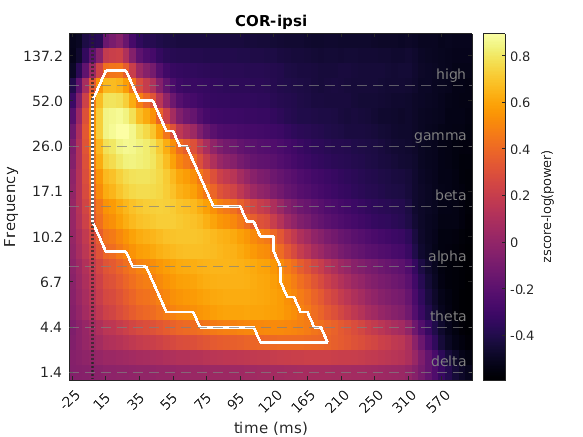

In [130]:

close all
cmap = myColors('inferno',[],[],[],0);
cmap = cmap.cm;
labelstring = 'zscore-log(power)'; %, 'zscore-sqrt(itpc)'
ttl = feature;
subplotCCEPspectrum(pw, ttl,time,freq,cmap,labelstring,5,3)
%caxis([0, 0.5])
% plot boundary
% pos
B = bwboundaries(stat1.T_obs_thr'>0); % initial threshold is 10
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'w', 'LineWidth', 2)
end
% neg is none
hold off

#### 4.2 COR-contr

In [131]:
feature = 'COR-contr';
filterboolean = strcmp(features0, feature);
pw = reshape(mean(d0(filterboolean, 1:npw), 1, 'omitnan'), [],ntime);
stat1 = load(['mnePermutationCluster1Sample-Ttest_sigClsts_grouplogpower_' feature '.mat']);


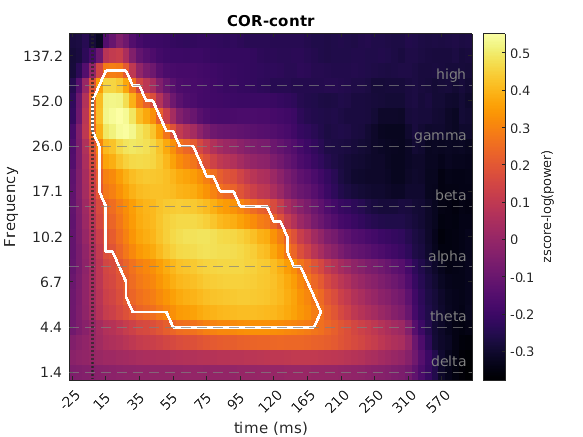

In [132]:
close all
cmap = myColors('inferno',[],[],[],0);
cmap = cmap.cm;
labelstring = 'zscore-log(power)'; %, 'zscore-sqrt(itpc)'
ttl = feature;
subplotCCEPspectrum(pw, ttl,time,freq,cmap,labelstring,5,3)
%caxis([0, 0.5])
% plot boundary
% pos
B = bwboundaries(stat1.T_obs_thr'>0); % initial threshold is 10
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'w', 'LineWidth', 2)
end
% neg is none
hold off

#### 4.3 THAL-ipsi

In [109]:
feature = 'THAL-ipsi';
filterboolean = strcmp(features0, feature);
pw = reshape(mean(d0(filterboolean, 1:npw), 1, 'omitnan'), [],ntime);
stat1 = load(['mnePermutationCluster1Sample-Ttest_sigClsts_grouplogpower_' feature '.mat']);

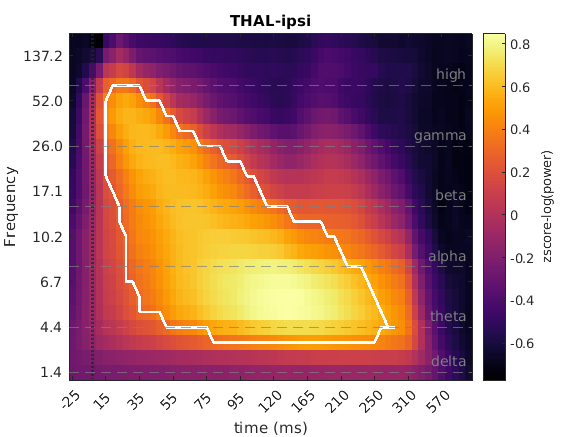

In [110]:
close all
cmap = myColors('inferno',[],[],[],0);
cmap = cmap.cm;
labelstring = 'zscore-log(power)'; %, 'zscore-sqrt(itpc)'
ttl = feature;
subplotCCEPspectrum(pw, ttl,time,freq,cmap,labelstring,5,3)
%caxis([-8, 8])
% plot boundary
% pos
B = bwboundaries(stat1.T_obs_thr'>0); % initial threshold is 5
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'w', 'LineWidth', 2)
end
% neg is none
hold off

#### 4.4 THAL-contr

In [111]:
feature = 'THAL-contr';
filterboolean = strcmp(features0, feature);
pw = reshape(mean(d0(filterboolean, 1:npw), 1, 'omitnan'), [],ntime);
stat1 = load(['mnePermutationCluster1Sample-Ttest_sigClsts_grouplogpower_' feature '.mat']);

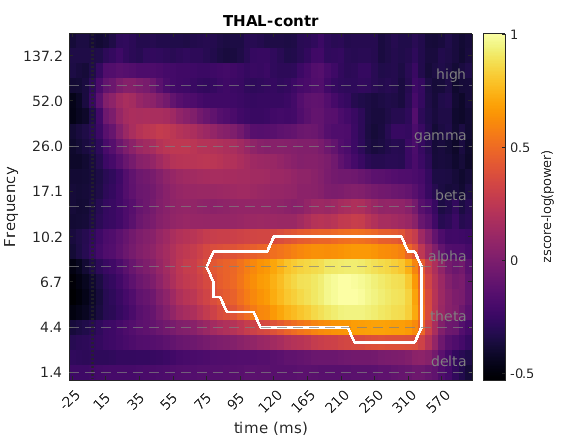

In [112]:
close all
cmap = myColors('inferno',[],[],[],0);
cmap = cmap.cm;
labelstring = 'zscore-log(power)'; %, 'zscore-sqrt(itpc)'
ttl = feature;
subplotCCEPspectrum(pw, ttl,time,freq,cmap,labelstring,5,3)
%caxis([-8, 8])
% plot boundary
% pos
B = bwboundaries(stat1.T_obs_thr'>0); % initial threshold = 10 for group level testing (as the subject number is relatively few = 20, extreme values are seen from the averaged within-sbj T-scores)
hold on
for k = 1:length(B)
   boundary = B{k};
   plot(boundary(:,2), boundary(:,1), 'w', 'LineWidth', 2)
end
% neg is none
hold off